In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("/Users/dev/Personal/DS & AI Class Notes/Data Sets/Boosting/abalone.csv",header=None )

col are 'Sex','Length','Whole weight','Viscera weight','Diameter','Height','Shucked weight','Shell weight','Rings' 

In [4]:
df.columns = ['Sex','Length','Whole weight','Viscera weight','Diameter','Height','Shucked weight','Shell weight','Rings']

In [5]:
df = df[['Length', 'Whole weight', 'Viscera weight', 'Diameter', 'Height',
       'Shucked weight', 'Shell weight', 'Rings','Sex']]

In [6]:
df

,Length,Whole weight,Viscera weight,Diameter,Height,Shucked weight,Shell weight,Rings,Sex
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,M
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,M
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,F
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,M
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,I
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,F
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,M
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,M
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,F


## Checking Balance of DF

In [7]:
df["Sex"].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

<AxesSubplot:>

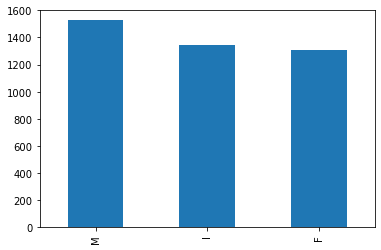

In [8]:
df["Sex"].value_counts().plot(kind = "bar")

In [9]:
def checkz(df):
    return df[df == 0].value_counts()

In [10]:
for i in df.columns:
    print(checkz(df[i]))

Series([], Name: Length, dtype: int64)
Series([], Name: Whole weight, dtype: int64)
0.0    2
Name: Viscera weight, dtype: int64
Series([], Name: Diameter, dtype: int64)
Series([], Name: Height, dtype: int64)
Series([], Name: Shucked weight, dtype: int64)
Series([], Name: Shell weight, dtype: int64)
Series([], Name: Rings, dtype: int64)
Series([], Name: Sex, dtype: int64)


In [11]:
df.columns

Index(['Length', 'Whole weight', 'Viscera weight', 'Diameter', 'Height',
       'Shucked weight', 'Shell weight', 'Rings', 'Sex'],
      dtype='object')

### Func for Removing Zeros But Not Applying...bcz all the samples are in b/w 0-1

In [12]:
clist = ['Length', 'Whole weight', 'Viscera weight', 'Diameter', 'Height',
       'Shucked weight', 'Shell weight', 'Rings']

In [13]:
def zeroremove(df):
    m = round(df.mean(),2)
    df.replace(0,m,inplace = True)

In [14]:
# for i in clist:
#     zeroremove(df[i])

In [15]:
for i in df.columns:
    print(checkz(df[i]))

Series([], Name: Length, dtype: int64)
Series([], Name: Whole weight, dtype: int64)
0.0    2
Name: Viscera weight, dtype: int64
Series([], Name: Diameter, dtype: int64)
Series([], Name: Height, dtype: int64)
Series([], Name: Shucked weight, dtype: int64)
Series([], Name: Shell weight, dtype: int64)
Series([], Name: Rings, dtype: int64)
Series([], Name: Sex, dtype: int64)


### OD_Tech With The help of Skew

In [16]:
def odiqr(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    low = q1 - (1.5 * iqr)
    high = q3 + (1.5 * iqr)
    m = df.mean()
    df = df.apply(lambda x : m if x < low else (m if x > high else x ) )
    return df

In [17]:
def odmsd(df):
    m = round(df.mean(),2)
    s = round(df.std(),2)
    low = round(m-(3*s),2)
    high = round(m+(3*s),2)
    ft1 = df[df<low]
    ft2 = df[df>high]
    df = df.map(lambda x : low if x < low else (high if x > high else x ))

In [18]:
for i in clist:
    print(f'{i} is {df[i].skew()}')

Length is -0.639873268981801
Whole weight is -0.6091981423290918
Viscera weight is 3.1288173790659615
Diameter is 0.5309585632523087
Height is 0.7190979217612694
Shucked weight is 0.5918521514155083
Shell weight is 0.6209268251392077
Rings is 1.114101898355677


In [19]:
for i in clist:
    if df[i].skew() <= 0.5:
        odmsd(df[i])
    else:
        df[i] = odiqr(df[i])

In [20]:
for i in clist:
    print(f'{i} is {df[i].skew()}')

Length is -0.639873268981801
Whole weight is -0.6091981423290918
Viscera weight is -0.18536302732730295
Diameter is 0.39235373317723926
Height is 0.42806642403527495
Shucked weight is 0.4557527876962757
Shell weight is 0.36801505496676334
Rings is 0.15139283233172263


### Encoding of df["Sex"] with Label Encoder

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le = LabelEncoder()

In [23]:
df = pd.concat([ df, pd.DataFrame(le.fit_transform(df["Sex"]),columns=["SEX"])],axis=1).drop("Sex",axis=1)

In [24]:
le.classes_

array(['F', 'I', 'M'], dtype=object)

In [25]:
df

,Length,Whole weight,Viscera weight,Diameter,Height,Shucked weight,Shell weight,Rings,SEX
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15.0,2
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7.0,2
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9.0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10.0,2
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7.0,1
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11.0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10.0,2
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9.0,2
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10.0,0


### Splitting

In [26]:
X = df.drop("SEX",axis=1)

In [27]:
X.sample()

,Length,Whole weight,Viscera weight,Diameter,Height,Shucked weight,Shell weight,Rings
861,0.595,0.465,0.14,1.113,0.5175,0.244,0.305,12.0


In [28]:
y = df["SEX"]

In [29]:
y.sample()

1926    2
Name: SEX, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold , cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [31]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=.30)

In [32]:
X.shape , Xtrain.shape , Xtest.shape

((4177, 8), (2923, 8), (1254, 8))

In [33]:
y.shape , ytrain.shape , ytest.shape

((4177,), (2923,), (1254,))

In [34]:
kf = KFold(n_splits=11)

In [35]:
rfc = RandomForestClassifier()

In [36]:
algo = [  rfc ]

### Without Feature Scaling


In [37]:
for i in algo:
    i.fit(Xtrain,ytrain)
    s = i.score(Xtest,ytest)
    print(f'{i} = {s}')

RandomForestClassifier() = 0.5470494417862839


### With Feature Scaling

In [38]:
ss = StandardScaler()

In [39]:
ss.fit(Xtrain)

StandardScaler()

In [40]:
Xtrain_ss = ss.transform(Xtrain)

In [41]:
Xtest_ss = ss.transform(Xtest)

In [42]:
for i in algo:
    i.fit(Xtrain_ss,ytrain)
    s = i.score(Xtest_ss,ytest)
    print(f'{i} = {s}')

RandomForestClassifier() = 0.5358851674641149


### With Cross Validation

In [43]:
for i in algo:
    s = cross_val_score(i,X,y,cv = kf)
    print(f'{i} = {s.mean()}')

RandomForestClassifier() = 0.5338709270177122


## XGBoosting

In [44]:
rfc1 = RandomForestClassifier(n_estimators=150,max_depth=2,max_leaf_nodes=3)

In [45]:
xg = XGBClassifier(use_label_encoder=False)

In [46]:
algo1 = [rfc1  , xg ]

In [47]:
for i in algo1:
    print(i)

RandomForestClassifier(max_depth=2, max_leaf_nodes=3, n_estimators=150)
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, use_label_encoder=False,
              validate_parameters=None, verbosity=None)


### Without Feature Scaling


In [48]:
for i in algo1:
    i.fit(Xtrain,ytrain)
    s = i.score(Xtest,ytest)
    print(f'{i} = {s}')

RandomForestClassifier(max_depth=2, max_leaf_nodes=3, n_estimators=150) = 0.5303030303030303
[17:50:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
       

### With Feature Scaling

In [49]:
for i in algo1:
    i.fit(Xtrain_ss,ytrain)
    s = i.score(Xtest_ss,ytest)
    print(f'{i} = {s}')

RandomForestClassifier(max_depth=2, max_leaf_nodes=3, n_estimators=150) = 0.5334928229665071
[17:50:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
       

###  With Cross Validation (Boosting)


In [50]:
%%time
for i in algo1:
    s = cross_val_score(i,X,y,cv = kf)
    print(f'{i} = {s.mean()}')

RandomForestClassifier(max_depth=2, max_leaf_nodes=3, n_estimators=150) = 0.52693312797465
[17:50:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:50:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:50:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metri